In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from dython.nominal import identify_nominal_columns
from dython.nominal import associations
sb.set()
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
happiness_data = pd.read_csv('2017.csv')
country_data = pd.read_csv('country_profile_variables.csv')

In [3]:
happiness_data

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

In [5]:
country_data

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2,70.7,2.8,3,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3,4714.1,6.8,51.2,42.0,4.2,37.6,58.2,6.6,59.8/77.1,175,176,21011,8790,12221,-10273,3.5,44.1,5,6,63.0/57.4,46.8/4.0,106.8/0.4,45.7,65.4,3.3,...,...,100.4/156.9,22.7/35.1,8.2/10.4,38.2,60.8,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99
6,Anguilla,Caribbean,91,15,165.7,97.6,320,2.9,21879.6,2.3,15.7,82.0,...,...,...,...,.../...,-99,-99,2,154,-153,-48,1.2,100

In [6]:
# Remove duplicate column name that caused columns names to shift left
cols = list(country_data.columns)
cols.remove('Mobile-cellular subscriptions (per 100 inhabitants).1')
country_data.columns = cols + ['remove']
country_data = country_data.drop(columns=['remove'])

In [7]:
happiness_data = pd.DataFrame(happiness_data[['Country', 'Happiness.Score']])
happiness_data = happiness_data.rename(columns={'Country': 'country'})
happiness_data

,country,Happiness.Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469
5,Netherlands,7.377
6,Canada,7.316
7,New Zealand,7.314
8,Sweden,7.284
9,Australia,7.284


In [8]:
Data = pd.merge(country_data, happiness_data, on="country")

In [19]:
Data

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Happiness.Score
0,Afghanistan,SouthernAsia,652864.0,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.60,10.0,28.50,8.60,19.3/83.6,125.0,125.0,1458,3568,-2110,-5121.0,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.30,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.10,9.8/0.3,63.0,5,78.2/47.0,45.1/27.0,21.43,3.794
1,Albania,SouthernEurope,28748.0,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.40,18.3,40.30,15.80,40.2/61.0,134.0,134.0,1962,4669,-2707,-1222.0,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.50,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.20,5.7/2.0,84.0,36,94.9/95.2,95.5/90.2,2.96,4.644
2,Algeria,NorthernAfrica,2381741.0,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.80,34.5,54.70,11.40,17.0/70.7,160.0,161.0,29992,47091,-17099,-27229.0,2.0,70.7,2.8,3.0,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,2.3,4.65,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113.0,38.2,135,0.80,145.4/3.7,5900.0,55,84.3/81.8,89.8/82.2,0.05,5.872
3,Angola,MiddleAfrica,1246700.0,29784,23.9,96.2,117955,3.0,4714.1,6.8,51.2,42.0,4.20,37.6,58.20,6.60,59.8/77.1,175.0,176.0,21011,8790,12221,-10273.0,3.5,44.1,5.0,6.0,63.0/57.4,46.8/4.0,106.8/0.4,45.7,65.4,3.3,2.3,4.65,100.4/156.9,22.7/35.1,8.2/10.4,38.2,60.8,12.4,146,46.50,34.8/1.4,3902.0,25,75.4/28.2,88.6/22.5,0.42,3.795
4,Argentina,SouthAmerica,2780400.0,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.00,24.8,73.10,6.50,48.6/74.4,119.0,119.0,57733,55610,2124,-15944.0,1.0,91.8,1.0,2.3,79.8/72.2,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.30,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.00,204.0/4.7,3167.0,85,99.0/100.0,96.2/98.3,0.01,6.599
5,Armenia,WesternAsia,29743.0,2930,102.9,88.8,10529,3.0,3489.1,19.0,28.3,52.8,35.00,15.7,49.30,16.60,55.3/74.2,135.0,135.0,1776,3230,-1455,-279.0,0.3,62.7,-0.1,1.6,77.0/70.6,20.0/16.9,191.2/6.3,19.3,13.2,4.5,2.8,2.80,98.5/98.5,89.0/88.1,46.9/41.6,9.9,115.2,58.2,114,11.70,5.

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     151 non-null    object 
 1   Region                                                      151 non-null    object 
 2   Surface area (km2)                                          151 non-null    object 
 3   Population in thousands (2017)                              151 non-null    int64  
 4   Population density (per km2, 2017)                          151 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               151 non-null    float64
 6   GDP: Gross domestic product (million current US$)           151 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              151 non-null    object 
 8   

In [11]:
for col in Data.columns:
    print('{} : {}'.format(col,Data[col].unique()))

country : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile'
 'Hong Kong S.A.R., China' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Congo (Kinshasa)'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Malta' 'Mauritania' 'Mauritius'
 'Mexico' 'Mongolia' 'Mo

In [12]:
for col in Data.columns:
    Data[col].replace({'-99':np.nan},inplace=True)
    Data[col].replace({-99:np.nan},inplace=True)
    Data[col].replace({'...':np.nan},inplace=True)
    Data[col].replace({'~0':0},inplace=True)
    Data[col].replace({'~0.0':0},inplace=True)
    Data[col].replace({'.../...':np.nan},inplace=True)
    Data[col].replace({'-~0.0':0},inplace=True)
    

In [13]:
Data.isnull().sum()

country                                                        0
Region                                                         0
Surface area (km2)                                             1
Population in thousands (2017)                                 0
Population density (per km2, 2017)                             0
Sex ratio (m per 100 f, 2017)                                  0
GDP: Gross domestic product (million current US$)              0
GDP growth rate (annual %, const. 2005 prices)                 0
GDP per capita (current US$)                                   0
Economy: Agriculture (% of GVA)                                0
Economy: Industry (% of GVA)                                   0
Economy: Services and other activity (% of GVA)                0
Employment: Agriculture (% of employed)                        1
Employment: Industry (% of employed)                           1
Employment: Services (% of employed)                           1
Unemployment (% of labour

In [14]:
num_col = ['Unemployment (% of labour force)', #
           'Balance of payments, current account (million US$)', #
           'Refugees and others of concern to UNHCR (in thousands)', #
           'Health: Physicians (per 1000 pop.)', #
           'Education: Government expenditure (% of GDP)', #
           'Net Official Development Assist. received (% of GNI)', # 
           'Surface area (km2)', #
           'Employment: Agriculture (% of employed)', #
           'Employment: Industry (% of employed)', #
           'Employment: Services (% of employed)', #
           'Forested area (% of land area)', #
           'Agricultural production index (2004-2006=100)', #
           'Food production index (2004-2006=100)', #
           'Health: Total expenditure (% of GDP)', #
           'Seats held by women in national parliaments %',  #
           'Energy production, primary (Petajoules)']#

for col in num_col:
    Data[col] = pd.to_numeric(Data[col])
    Data[col].fillna(Data[col].median(), inplace=True)

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     151 non-null    object 
 1   Region                                                      151 non-null    object 
 2   Surface area (km2)                                          151 non-null    float64
 3   Population in thousands (2017)                              151 non-null    int64  
 4   Population density (per km2, 2017)                          151 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               151 non-null    float64
 6   GDP: Gross domestic product (million current US$)           151 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              151 non-null    object 
 8   

In [16]:
Data['GDP growth rate (annual %, const. 2005 prices)'] = Data['GDP growth rate (annual %, const. 2005 prices)'].astype('float64')
Data['Economy: Agriculture (% of GVA)'] = Data['Economy: Agriculture (% of GVA)'].astype('float64')
Data['International trade: Exports (million US$)'] = Data['International trade: Exports (million US$)'].astype('int64')
Data['International trade: Imports (million US$)'] = Data['International trade: Imports (million US$)'].astype('int64')
Data['International trade: Balance (million US$)'] = Data['International trade: Balance (million US$)'].astype('int64')
Data['Population growth rate (average annual %)'] = Data['Population growth rate (average annual %)'].astype('float64')
Data['Urban population growth rate (average annual %)'] = Data['Urban population growth rate (average annual %)'].astype('float64')
Data['Fertility rate, total (live births per woman)'] = Data['Fertility rate, total (live births per woman)'].astype('float64')
Data['Infant mortality rate (per 1000 live births'] = Data['Infant mortality rate (per 1000 live births'].astype('float64')
Data['Mobile-cellular subscriptions (per 100 inhabitants)'] = Data['Mobile-cellular subscriptions (per 100 inhabitants)'].astype('float64')
Data['Individuals using the Internet (per 100 inhabitants)'] = Data['Individuals using the Internet (per 100 inhabitants)'].astype('float64')

In [20]:
# NOT USED-- #
Data['Surface area (km2)'] = Data['Surface area (km2)'].astype('int64')
Data['Employment: Agriculture (% of employed)'] = Data['Employment: Agriculture (% of employed)'].astype('float64')
Data['Employment: Industry (% of employed)'] = Data['Employment: Industry (% of employed)'].astype('float64')
Data['Employment: Services (% of employed)'] = Data['Employment: Services (% of employed)'].astype('float64')
Data['Forested area (% of land area)'] = Data['Forested area (% of land area)'].astype('float64')
Data['Unemployment (% of labour force)'] = Data['Unemployment (% of labour force)'].astype('float64')
Data['Balance of payments, current account (million US$)'] = Data['Balance of payments, current account (million US$)'].astype('int64')
Data['Refugees and others of concern to UNHCR (in thousands)'] = Data['Refugees and others of concern to UNHCR (in thousands)'].astype('float64')


In [ ]:
Pop. using improved drinking water (urban/rural, %)
Pop. using improved sanitation facilities (urban/rural, %)
Labour force participation (female/male pop. %)
Life expectancy at birth (females/males, years)
Population age distribution (0-14 / 60+ years, %)
International migrant stock (000/% of total pop.)
Education: Primary gross enrol. ratio (f/m per 100 pop.)
Education: Secondary gross enrol. ratio (f/m per 100 pop.)
Education: Tertiary gross enrol. ratio (f/m per 100 pop.)

In [6]:
Data.to_excel("output.xlsx")

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     151 non-null    object 
 1   Region                                                      151 non-null    object 
 2   Surface area (km2)                                          151 non-null    float64
 3   Population in thousands (2017)                              151 non-null    int64  
 4   Population density (per km2, 2017)                          151 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               151 non-null    float64
 6   GDP: Gross domestic product (million current US$)           151 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              151 non-null    float64
 8   

<AxesSubplot:>

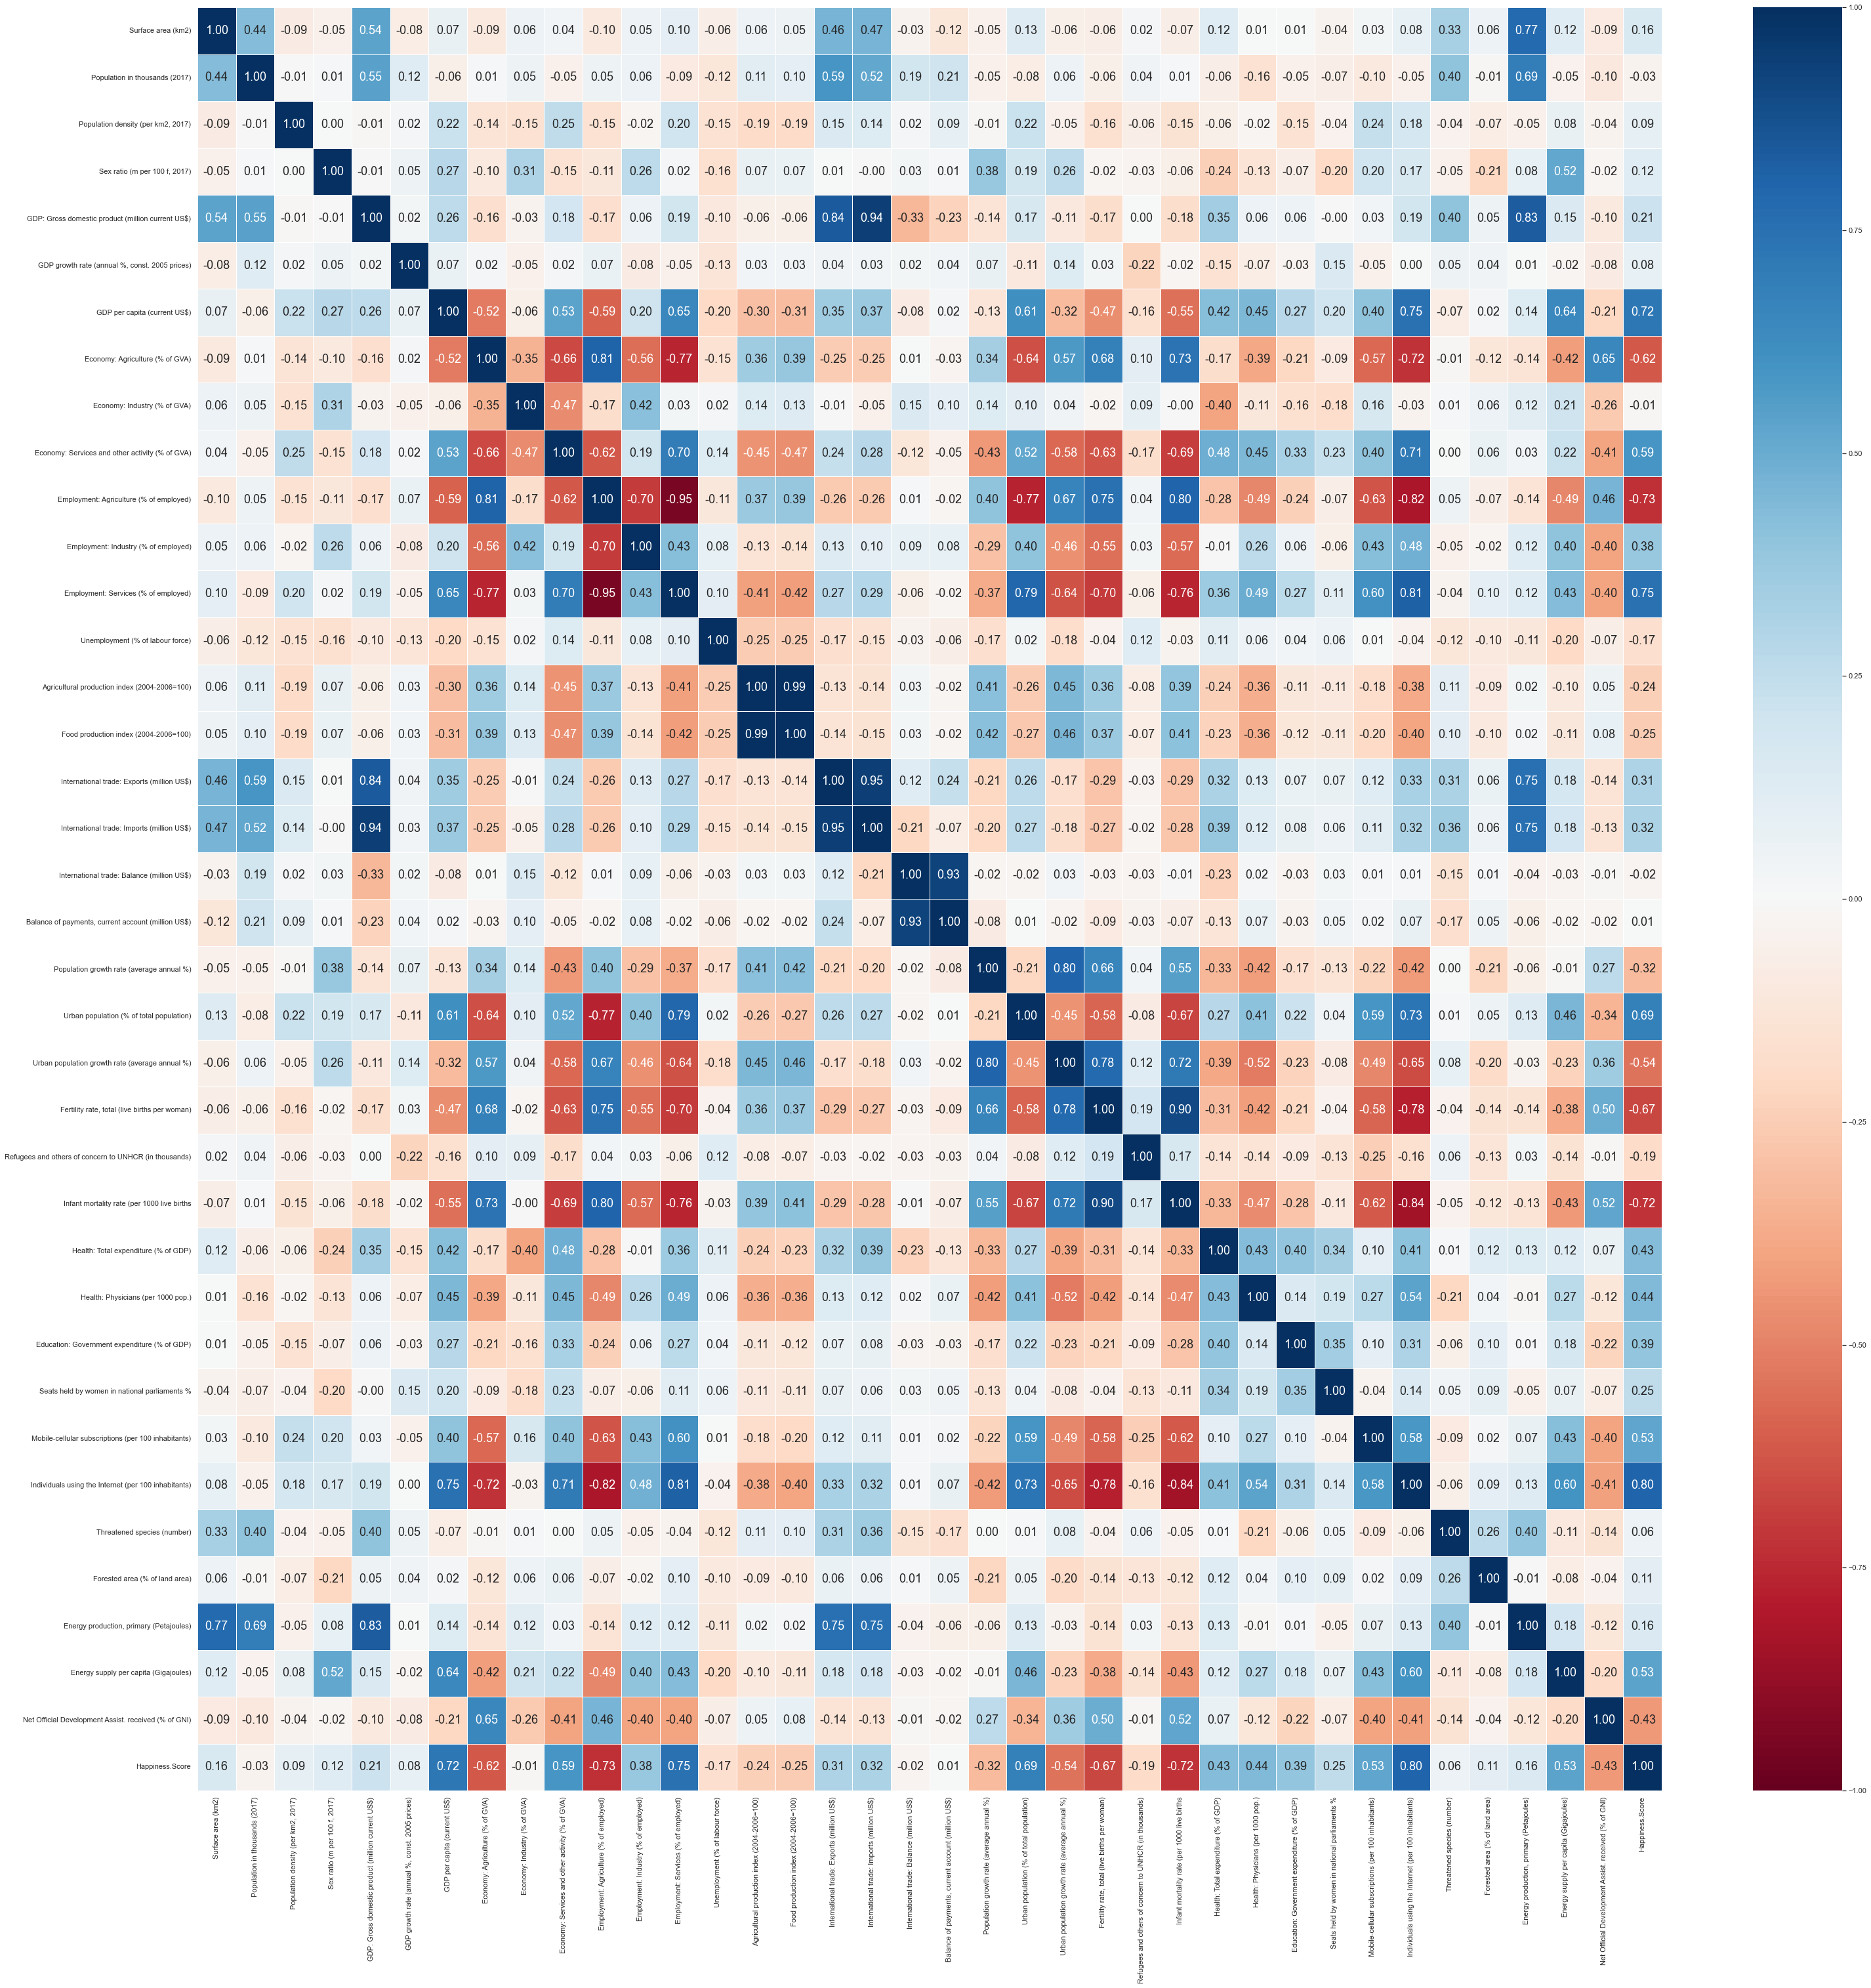

In [18]:
f = plt.figure(figsize=(50, 50))
sb.heatmap(Data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [8]:
country_data['country'].nunique()

229

In [9]:
count = 0
for i in country_data['country']:
    if i in happiness_data['Country'].unique():
        count += 1
        
print(count)

KeyError: 'Country'

In [ ]:
for i in happiness_data['country']:
    if i not in country_data['country'].unique():
        print(i)